In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv")
df['Revenue'] = LabelEncoder().fit_transform(df.Revenue.values)
l={'OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Month'}
for s in l:
  df = df.astype({s: object})
df.describe().loc[['mean','min','max']]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.74622,0.022191,0.043073,5.889258,0.061427,0.154745
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.52223,0.200000,0.200000,361.763742,1.000000,1.000000


In [169]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue,VisitorType_T,Weekend_T,Month_T,Browser_T,TrafficType_T
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,0.154745,0.869505,0.232603,2.143633,1.155718,1.779238
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.361676,0.356740,0.422509,0.757188,0.473914,0.790234
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,2.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,1.000000,2.000000,1.000000,4.000000,9.000000,17.000000


In [130]:
df['Revenue'].value_counts(dropna=True)

0    10422
1     1908
Name: Revenue, dtype: int64

## Modelando

In [146]:
# Reemplazando valores
df['VisitorType_T']=df['VisitorType']


df['VisitorType_T'] = df['VisitorType_T'].replace('New_Visitor',0)
df['VisitorType_T'] = df['VisitorType_T'].replace('Returning_Visitor',1)
df['VisitorType_T'] = df['VisitorType_T'].replace('Other',2)

df['Weekend_T']=df['Weekend']
df['Weekend_T'] = df['Weekend_T'].astype(int)

df['Month_T']=df['Month']

df['Month_T'] = df['Month_T'].replace('Feb',4)
df['Month_T'] = df['Month_T'].replace('Mar',2)
df['Month_T'] = df['Month_T'].replace('May',2)
df['Month_T'] = df['Month_T'].replace('June',2)
df['Month_T'] = df['Month_T'].replace('Jul',1)
df['Month_T'] = df['Month_T'].replace('Aug',1)
df['Month_T'] = df['Month_T'].replace('Sep',3)
df['Month_T'] = df['Month_T'].replace('Oct',3)
df['Month_T'] = df['Month_T'].replace('Nov',3)
df['Month_T'] = df['Month_T'].replace('Dec',1)

df['Browser_T']=df['Browser']

df['Browser_T'] = df['Browser_T'].replace(1,1)
df['Browser_T'] = df['Browser_T'].replace(2,1)
df['Browser_T'] = df['Browser_T'].replace(6,1)
df['Browser_T'] = df['Browser_T'].replace(7,1)
df['Browser_T'] = df['Browser_T'].replace(8,1)

df['Browser_T'] = df['Browser_T'].replace(4,2)
df['Browser_T'] = df['Browser_T'].replace(5,2)
df['Browser_T'] = df['Browser_T'].replace(10,2)

df['Browser_T'] = df['Browser_T'].replace(12,3)
df['Browser_T'] = df['Browser_T'].replace(13,3)
df['Browser_T'] = df['Browser_T'].replace(11,3)

df['Browser_T'] = df['Browser_T'].replace(3,4)


df['TrafficType_T']=df['TrafficType']


df['TrafficType_T'] = df['TrafficType_T'].replace(1,1)
df['TrafficType_T'] = df['TrafficType_T'].replace(3,1)
df['TrafficType_T'] = df['TrafficType_T'].replace(9,1)
df['TrafficType_T'] = df['TrafficType_T'].replace(13,1)
df['TrafficType_T'] = df['TrafficType_T'].replace(14,1)
df['TrafficType_T'] = df['TrafficType_T'].replace(19,1)

df['TrafficType_T'] = df['TrafficType_T'].replace(2,2)
df['TrafficType_T'] = df['TrafficType_T'].replace(7,2)
df['TrafficType_T'] = df['TrafficType_T'].replace(8,2)
df['TrafficType_T'] = df['TrafficType_T'].replace(16,2)
df['TrafficType_T'] = df['TrafficType_T'].replace(20,2)

df['TrafficType_T'] = df['TrafficType_T'].replace(4,3)
df['TrafficType_T'] = df['TrafficType_T'].replace(5,3)
df['TrafficType_T'] = df['TrafficType_T'].replace(6,3)
df['TrafficType_T'] = df['TrafficType_T'].replace(10,3)
df['TrafficType_T'] = df['TrafficType_T'].replace(11,3)

df['TrafficType_T'] = df['TrafficType_T'].replace(15,4)
df['TrafficType_T'] = df['TrafficType_T'].replace(18,4)


# Eliminando outliers

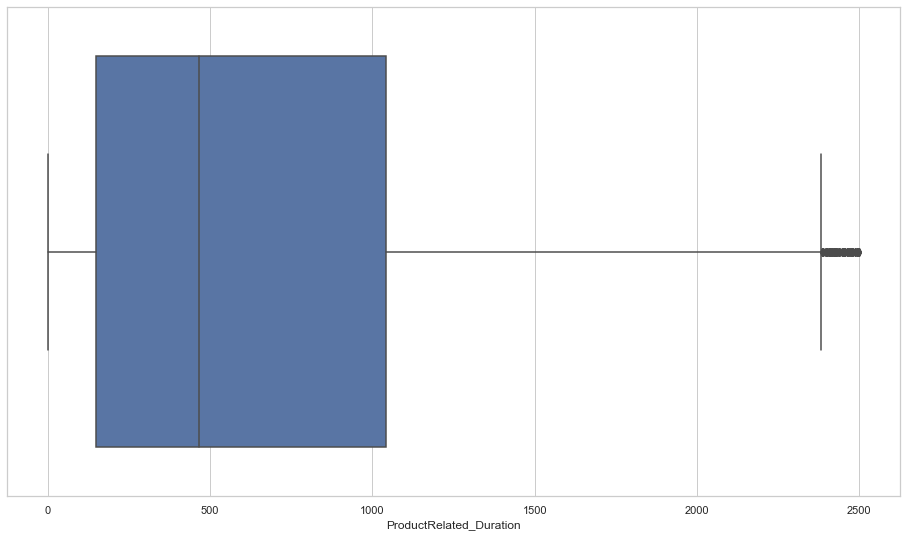

In [221]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df1['ProductRelated_Duration'])

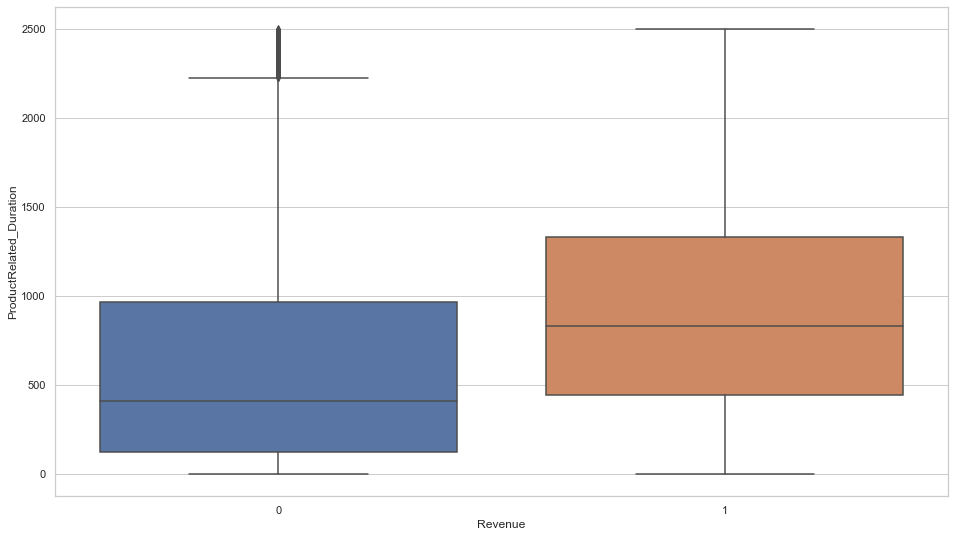

In [217]:
ax = sns.boxplot(x="Revenue", y="ProductRelated_Duration", data=df1)

In [ ]:
df1[df1['Informational_Duration']>2500].count()

In [227]:
df1 = df.drop(df[df['Administrative_Duration']>1600].index)

In [228]:
df1 = df1.drop(df1[df1['ProductRelated_Duration']>2500].index)

In [229]:
X = df1[["Administrative_Duration","Informational_Duration","ProductRelated_Duration","PageValues",
                   "SpecialDay","VisitorType_T","TrafficType_T","Weekend_T","Browser_T","Month_T"]]
y = df1['Revenue']

X = pd.get_dummies(X, columns = ["VisitorType_T", "Weekend_T","TrafficType_T","Browser_T","Month_T"], drop_first = True)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=42)
print(X_train.shape, X_test.shape)

(7530, 19) (3228, 19)


In [230]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4) #4
knn.fit(X_train, y_train)
print('Con KNN')
print('SCORE', knn.score(X_test, y_test))

Con KNN
SCORE 0.88909541511772


In [231]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print('Con random forestt')
print('SCORE', rfc.score(X_test, y_test))

Con random forestt
SCORE 0.9073729863692689


In [232]:
from sklearn.svm import SVC
svm = SVC(kernel='poly', degree=2)
svm.fit(X_train, y_train)
print('Con SVC')
print('SCORE', svm.score(X_test, y_test))

Con SVC
SCORE 0.872366790582404


In [233]:
evc = VotingClassifier(estimators=[('rfc', rfc), ('knn', knn), ('svm', svm)], voting='hard')
evc.fit(X_train, y_train)
print('COn ensemble Voting')
print('SCORE', evc.score(X_test, y_test))

COn ensemble Voting
SCORE 0.8940520446096655
